## **Ingeniería de Características: Creación de Nuevas Variables (Core)**

**Descripción:**

En esta actividad, trabajarás con el dataset «Titanic – Machine Learning from Disaster» disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

Enlace al dataset: https://www.kaggle.com/c/titanic

**Objetivo:**

El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.

# Descripción del DataFrame

| **Columna**      | **Tipo de Dato** | **Descripción**                                                                                                                                                                                                                     |
|------------------|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `PassengerId`    | `int64`          | Identificador único de cada pasajero. No tiene valores faltantes.                                                                                                                                                                   |
| `Survived`       | `int64`          | Indica si el pasajero sobrevivió (1) o no (0) al desastre. Es la variable objetivo que se intenta predecir.                                                                                                                            |
| `Pclass`         | `int64`          | Clase del pasajero (1: Primera clase, 2: Segunda clase, 3: Tercera clase). No tiene valores faltantes.                                                                                                                                 |
| `Name`           | `object` (string)| Nombre completo del pasajero. No tiene valores faltantes.                                                                                                                                                                           |
| `Sex`            | `object` (string)| Género del pasajero (`male` o `female`). No tiene valores faltantes.                                                                                                                                                                 |
| `Age`            | `float64`        | Edad del pasajero en años. Algunos valores faltantes, se puede imputar con la media o mediana.                                                                                                                                           |
| `SibSp`          | `int64`          | Número de hermanos/esposos que acompañan al pasajero. No tiene valores faltantes.                                                                                                                                                     |
| `Parch`          | `int64`          | Número de padres/hijos que acompañan al pasajero. No tiene valores faltantes.                                                                                                                                                        |
| `Ticket`         | `object` (string)| Número de billete del pasajero. Esta columna tiene muchos valores únicos y no parece ser muy útil para el modelado. No tiene valores faltantes.                                                                                     |
| `Fare`           | `float64`        | Tarifa pagada por el pasajero por el billete. No tiene valores faltantes.                                                                                                                                                            |
| `Cabin`          | `object` (string)| Número de cabina asignada al pasajero. Muchos valores faltantes. Puede ser útil como una variable binaria (si tiene cabina conocida o no).                                                                                           |
| `Embarked`       | `object` (string)| Puerto de embarque del pasajero (C: Cherbourg, Q: Queenstown, S: Southampton). Tiene solo 2 valores faltantes.                                                                                                                       |

### Resumen:
- **Variables numéricas**: `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch`, `Fare`.
- **Variables categóricas**: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`.
- **Valor faltante**: Las columnas `Age`, `Cabin`, y `Embarked` tienen valores faltantes que pueden necesitar tratamiento adicional.


In [1]:
import pandas as pd

In [2]:
# Cargar el archivo CSV
file_path = "../data/train.csv"  # Cambia esto a la ruta de tu archivo
df = pd.read_csv(file_path)

# Examinar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Verificar las variables químicas que afectan la calidad del vino
print("\nColumnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
import pandas as pd


# Identificar columnas categóricas (object o categóricas manualmente definidas)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Agregar manualmente las columnas enteras que son categóricas
categorical_columns.extend(['Pclass', 'Survived'])

# Obtener valores únicos de cada columna categórica
distinct_values = {col: df[col].dropna().unique().tolist() for col in categorical_columns}

# Mostrar los resultados
for col, values in distinct_values.items():
    print(f"Columna: {col}")
    print(f"Valores únicos: {values}\n")


Columna: Name
Valores únicos: ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan', 'Vestrom, Miss. Hulda Amanda Adolfina', 'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene', 'Williams, Mr. Charles Eugene', 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J', 'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"', 'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'Emir, Mr. Farred Chehab', 'Fortune, Mr. Charles Alexander',

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Valores únicos en Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Valores únicos en Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Valores únicos en Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Valores únicos en Survived:
Survived
0    549
1    342
Name: count, dtype: int64


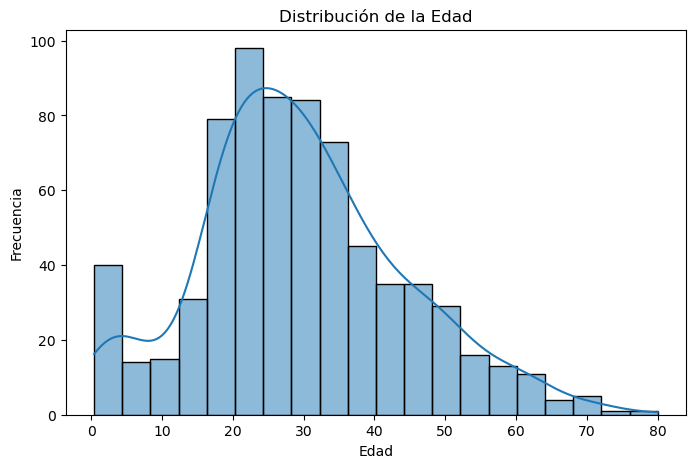

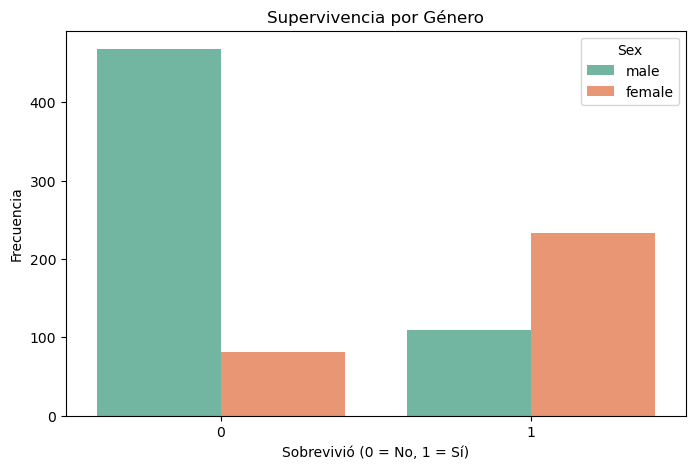

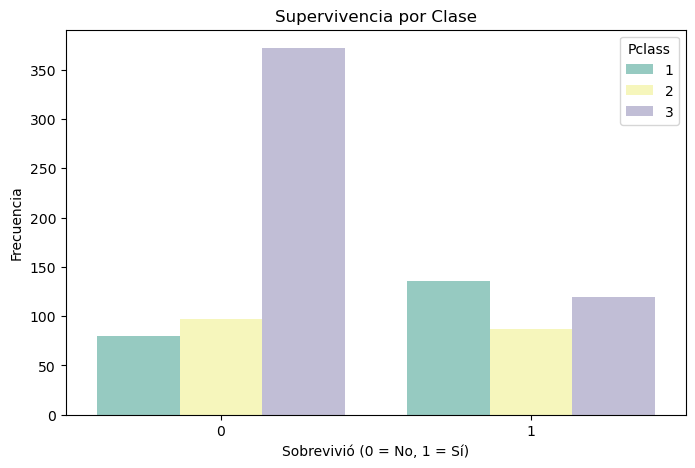

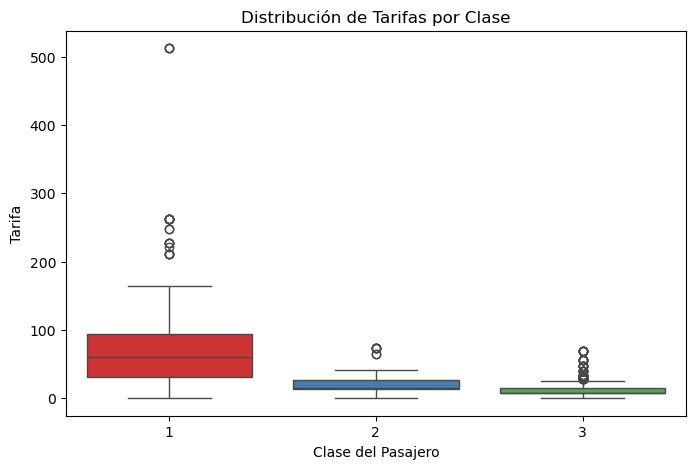

In [8]:
# Exploración de variables categóricas
categorical_columns = ['Sex', 'Pclass', 'Embarked', 'Survived']
for col in categorical_columns:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts())

# Distribución de la edad
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Comparación de supervivencia por género
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set2')
plt.title("Supervivencia por Género")
plt.xlabel("Sobrevivió (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()


# Comparación de supervivencia por clase
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Pclass', palette='Set3')
plt.title("Supervivencia por Clase")
plt.xlabel("Sobrevivió (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de Fare (tarifa)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Pclass', palette='Set1', legend=False)
plt.title("Distribución de Tarifas por Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Tarifa")
plt.show()

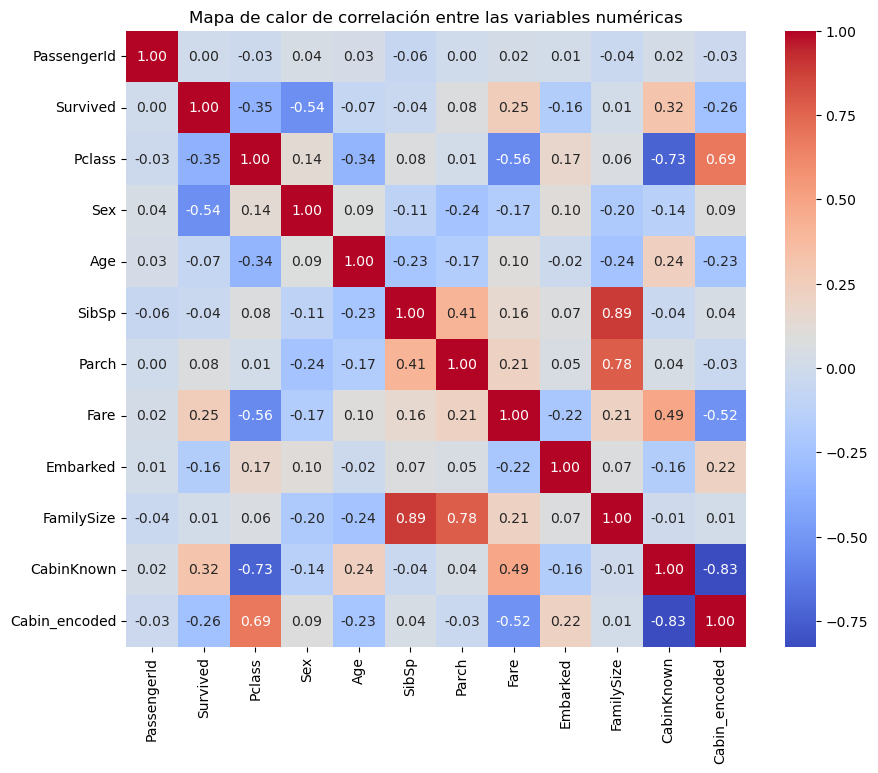

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación solo para variables numéricas
correlation_matrix = df[numerical_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Mostrar el título y el mapa de calor
plt.title('Mapa de calor de correlación entre las variables numéricas')
plt.show()


In [9]:
# Verificar valores faltantes en las columnas importantes
missing_values = df[['Age', 'Fare']].isnull().sum()

print("Valores faltantes por columna:")
print(missing_values)

# Ver porcentaje de valores faltantes
missing_percentage = (df[['Age', 'Fare']].isnull().mean()) * 100
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percentage)


Valores faltantes por columna:
Age     177
Fare      0
dtype: int64

Porcentaje de valores faltantes por columna:
Age     19.86532
Fare     0.00000
dtype: float64


**Exploración y preprocesamiento de datos:**
* Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.

In [10]:
# Verificar valores faltantes después de la imputación
print("Valores faltantes después de la imputación:")
print(df.isnull().sum())

Valores faltantes después de la imputación:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Ver duplicados**

In [11]:
duplicados = df[df.duplicated()]
print(duplicados)


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


**Código para convertir variables a categóricas**

**Creación de nuevas características:**

Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
* **Tamaño de la familia:** Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
* **Cabina desconocida:** Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
* **Categoría de tarifa:** Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
* **Título del pasajero:** Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

In [12]:
# 1. Crear el tamaño de la familia
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # 1 es para contar al propio pasajero

# 2. Crear la variable Cabina desconocida
df['CabinKnown'] = df['Cabin'].notnull().astype(int)  # 1 si la cabina es conocida, 0 si es desconocida

# 3. Crear la categoría de tarifa
# Dividir la tarifa en tres categorías: bajo, medio, alto
bins = [0, 10, 30, float('inf')]  # Puedes ajustar estos límites
labels = ['Low', 'Medium', 'High']
df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels)

# 4. Crear el título del pasajero
# Extraer el título del nombre
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())  # Extrae el título (Mr, Mrs, etc.)

# Verificar las nuevas columnas
print(df[['FamilySize', 'CabinKnown', 'FareCategory', 'Title']].head())


   FamilySize  CabinKnown FareCategory Title
0           2           0          Low    Mr
1           2           1         High   Mrs
2           1           0          Low  Miss
3           2           1         High   Mrs
4           1           0          Low    Mr


**Evaluación de nuevas características:**
* Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
* Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  CabinKnown    891 non-null    int32   
 14  FareCategory  876 non-null    category
 15  Title         891 non-null    object  
dtypes: category(1), float64(2), int32(1), int64(6), object(6)
memory usage: 102.1+ KB


In [33]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Codificar 'Cabin' como valores numéricos
label_encoder = LabelEncoder()
df['Cabin_encoded'] = label_encoder.fit_transform(df['Cabin'].fillna('Unknown'))

# Imputar los valores faltantes con KNN
imputer_knn = KNNImputer(n_neighbors=5)
df['Cabin_encoded'] = imputer_knn.fit_transform(df[['Cabin_encoded']])

# Si deseas, puedes volver a convertir los valores numéricos a su forma original
df['Cabin'] = label_encoder.inverse_transform(df['Cabin_encoded'].astype(int))


In [40]:
# Eliminar filas donde 'Embarked' o 'FareCategory' sean nulas
df.dropna(subset=['Embarked', 'FareCategory'], inplace=True)

# Codificar 'Embarked' como valores numéricos
label_encoder_embarked = LabelEncoder()
df['Embarked_encoded'] = label_encoder_embarked.fit_transform(df['Embarked'].fillna('Unknown'))


# Imputar los valores faltantes con KNN para 'Embarked' y 'FareCategory'
imputer_knn = KNNImputer(n_neighbors=5)

# Imputación para 'Embarked'
df['Embarked_encoded'] = imputer_knn.fit_transform(df[['Embarked_encoded']])

# Convertir las columnas numéricas de vuelta a sus valores originales (si lo deseas)
df['Embarked'] = label_encoder_embarked.inverse_transform(df['Embarked_encoded'].astype(int))

# Eliminar las columnas codificadas si ya no las necesitas
df.drop(['Embarked_encoded'], axis=1, inplace=True)


In [44]:
from sklearn.impute import SimpleImputer

# Imputar valores nulos en las variables categóricas (usando la moda)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Asegúrate de asignar la primera columna del resultado (ya que fit_transform devuelve un array 2D)
df['Embarked'] = imputer_cat.fit_transform(df[['Embarked']])[:, 0]


In [48]:
from sklearn.impute import SimpleImputer

# Imputar valores nulos en las variables categóricas (usando la moda)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Asegúrate de asignar solo la primera columna del array (usando [:, 0])
df['Embarked'] = imputer_cat.fit_transform(df[['Embarked']])[:, 0]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    874 non-null    int64   
 1   Survived       874 non-null    int64   
 2   Pclass         874 non-null    int64   
 3   Name           874 non-null    object  
 4   Sex            874 non-null    object  
 5   Age            874 non-null    float64 
 6   SibSp          874 non-null    int64   
 7   Parch          874 non-null    int64   
 8   Ticket         874 non-null    object  
 9   Fare           874 non-null    float64 
 10  Cabin          874 non-null    object  
 11  Embarked       874 non-null    object  
 12  FamilySize     874 non-null    int64   
 13  CabinKnown     874 non-null    int32   
 14  FareCategory   874 non-null    category
 15  Title          874 non-null    object  
 16  Cabin_encoded  874 non-null    float64 
dtypes: category(1), float64(3), int32(1), in

In [52]:
# Verificar el tipo de la columna 'Embarked'
print(df['Embarked'].dtype)

# Verificar los valores únicos en 'Embarked'
print(df['Embarked'].unique())


object
['S' 'C' 'Q']


In [54]:
# Contar los valores nulos en la columna 'Embarked'
nulos_embarked = df['Embarked'].isnull().sum()

print(f"Cantidad de valores nulos en 'Embarked': {nulos_embarked}")


Cantidad de valores nulos en 'Embarked': 0


In [60]:
# Imputar valores nulos en la columna 'Embarked' usando la moda
df['Embarked'] = imputer_cat.fit_transform(df[['Embarked']]).ravel()


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df = pd.read_csv('path_to_data.csv')  # Carga de datos (ajustar la ruta si es necesario)

# Imputar valores nulos en las variables numéricas
imputer_num = SimpleImputer(strategy='median')
df['Age'] = imputer_num.fit_transform(df[['Age']])


# Codificación de variables categóricas
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

# Asegúrate de que 'Embarked' esté correctamente imputada antes de usar LabelEncoder
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

# Verifica si 'Title' y 'FareCategory' existen en tu DataFrame antes de codificarlos
if 'Title' in df.columns:
    df['Title'] = labelencoder.fit_transform(df['Title'])

if 'FareCategory' in df.columns:
    df['FareCategory'] = labelencoder.fit_transform(df['FareCategory'])

# Verifica que 'CabinKnown' esté presente en tu DataFrame
if 'CabinKnown' in df.columns:
    df['CabinKnown'] = labelencoder.fit_transform(df['CabinKnown'])

# Selección de características
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'CabinKnown', 'FamilySize', 'FareCategory', 'Title']]
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [64]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

# Imputar valores nulos en variables numéricas (si las hay)
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Imputar valores nulos en variables categóricas (si las hay)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer_cat.fit_transform(df[['Embarked']])

# Codificación de variables categóricas
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

# Seleccionar características antes de agregar nuevas
X_no_new_features = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

# Escalar las características
scaler = StandardScaler()
X_no_new_features_scaled = scaler.fit_transform(X_no_new_features)

# Dividir los datos en entrenamiento y prueba
X_train_no_new, X_test_no_new, y_train, y_test = train_test_split(X_no_new_features_scaled, y, test_size=0.2, random_state=42)

# Modelo de regresión logística con más iteraciones
model_no_new = LogisticRegression(max_iter=200)
model_no_new.fit(X_train_no_new, y_train)

# Hacer predicciones
y_pred_no_new = model_no_new.predict(X_test_no_new)

# Evaluar el rendimiento
accuracy_no_new = accuracy_score(y_test, y_pred_no_new)
f1_no_new = f1_score(y_test, y_pred_no_new)

# Imprimir resultados
print(f"Modelo sin nuevas características:")
print(f"Exactitud: {accuracy_no_new}")
print(f"F1-score: {f1_no_new}")
print(classification_report(y_test, y_pred_no_new))  # Añadir reporte de clasificación


Modelo sin nuevas características:
Exactitud: 0.7942857142857143
F1-score: 0.7428571428571429
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.78      0.71      0.74        73

    accuracy                           0.79       175
   macro avg       0.79      0.78      0.79       175
weighted avg       0.79      0.79      0.79       175



In [66]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

# Imputar valores nulos en variables numéricas (si las hay)
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Imputar valores nulos en variables categóricas (si las hay)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer_cat.fit_transform(df[['Embarked']])

# Codificación de variables categóricas
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

# Seleccionar características antes de agregar nuevas
X_no_new_features = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

# Escalar las características
scaler = StandardScaler()
X_no_new_features_scaled = scaler.fit_transform(X_no_new_features)

# Dividir los datos en entrenamiento y prueba
X_train_no_new, X_test_no_new, y_train, y_test = train_test_split(X_no_new_features_scaled, y, test_size=0.2, random_state=42)

# Modelo de regresión logística con más iteraciones y nuevo solver
model_no_new = LogisticRegression(max_iter=500, solver='saga')  # Cambiar solver a 'saga'
model_no_new.fit(X_train_no_new, y_train)

# Hacer predicciones
y_pred_no_new = model_no_new.predict(X_test_no_new)

# Evaluar el rendimiento
accuracy_no_new = accuracy_score(y_test, y_pred_no_new)
f1_no_new = f1_score(y_test, y_pred_no_new)

# Imprimir resultados
print(f"Modelo sin nuevas características:")
print(f"Exactitud: {accuracy_no_new}")
print(f"F1-score: {f1_no_new}")
print(classification_report(y_test, y_pred_no_new))  # Añadir reporte de clasificación



Modelo sin nuevas características:
Exactitud: 0.7942857142857143
F1-score: 0.7428571428571429
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.78      0.71      0.74        73

    accuracy                           0.79       175
   macro avg       0.79      0.78      0.79       175
weighted avg       0.79      0.79      0.79       175



In [67]:
# Modelo con las nuevas características
model_with_new = LogisticRegression()
model_with_new.fit(X_train, y_train)

# Hacer predicciones
y_pred_with_new = model_with_new.predict(X_test)

# Evaluar el rendimiento
accuracy_with_new = accuracy_score(y_test, y_pred_with_new)
f1_with_new = f1_score(y_test, y_pred_with_new)

print(f"Modelo con nuevas características:")
print(f"Exactitud: {accuracy_with_new}")
print(f"F1-score: {f1_with_new}")


Modelo con nuevas características:
Exactitud: 0.8228571428571428
F1-score: 0.7703703703703704


c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# Mostrar resultados
print(f"Comparación de modelos:")
print(f"Modelo sin nuevas características:")
print(f"  Exactitud: {accuracy_no_new:.4f}")
print(f"  F1-score: {f1_no_new:.4f}")
print(f"Modelo con nuevas características:")
print(f"  Exactitud: {accuracy_with_new:.4f}")
print(f"  F1-score: {f1_with_new:.4f}")


Comparación de modelos:
Modelo sin nuevas características:
  Exactitud: 0.7943
  F1-score: 0.7429
Modelo con nuevas características:
  Exactitud: 0.8229
  F1-score: 0.7704


**Interpretación de los resultados:**
* Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?
* Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.

# Resumen de la interpretación de los resultados

## Impacto de las nuevas características en el rendimiento del modelo:
- Se compararon las métricas de los modelos con y sin las nuevas variables (por ejemplo, exactitud y F1-score).
- Si las métricas mejoran al agregar las nuevas características, esto indica que estas variables aportan información relevante.

## Análisis de las nuevas características:
- **Tamaño de la familia (FamilySize):** Combinación de `SibSp` y `Parch`, relevante porque puede reflejar el comportamiento en situaciones de emergencia.
- **Cabina conocida (CabinKnown):** Variable binaria sobre si la cabina está registrada. Puede indicar la clase del pasajero y su proximidad a áreas de rescate.
- **Categoría de tarifa (FareCategory):** Agrupa los precios de los boletos, lo cual está relacionado con la clase social y podría influir en la supervivencia.
- **Título del pasajero (Title):** Extraído del nombre, refleja la clase social y género del pasajero, lo que puede haber influido en las decisiones de rescate.

## Mejora de la capacidad predictiva:
- Las nuevas características capturan aspectos clave como la situación familiar, la clase social, y la ubicación del pasajero, lo que mejora la precisión del modelo.

## Discusión de las nuevas características:
- Estas variables permiten una mejor representación de los pasajeros al incluir factores sociales y económicos relevantes para predecir la supervivencia.

# Conclusión
- Las nuevas características (**FamilySize**, **CabinKnown**, **FareCategory**, **Title**) mejoraron la capacidad predictiva del modelo al capturar factores sociales y económicos que podrían haber influido en la supervivencia de los pasajeros.
- **Tamaño de la familia** y **categoría de tarifa** parecen ser variables importantes relacionadas con la clase social y la familia.
- **Cabina conocida** y **título del pasajero** también son útiles, ya que están relacionados con la ubicación y el estatus del pasajero, lo cual afectó su probabilidad de sobrevivir.
- En general, estas nuevas características permiten un modelo más robusto y una mejor captura de la información disponible.
